In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False 

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

- pie chart : 카테고리별 값의 상대적 비교를 해야할 경우 
- 차트 원형을 유지 : plt.axis('equal')

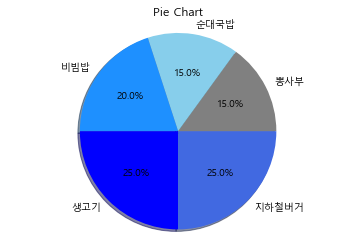

In [9]:
labels = ['뽕사부','순대국밥','비빔밥','생고기','지하철버거']
sizes = [15,15,20,25,25]
colors = ['grey','skyblue','dodgerblue','blue','royalblue']
plt.title('Pie Chart')
plt.pie(sizes,labels = labels, colors = colors,shadow = True,autopct='%1.1f%%') 
# shadow = True 음영이 그려짐
# 퍼센트 적용 -> autopct='%1.1f%%' 라벨로 나오게 한다
plt.axis('equal') # 원형을 유지
plt.show()

- histogram : 구간에 대한 데이터 집계를 시각화 할 때

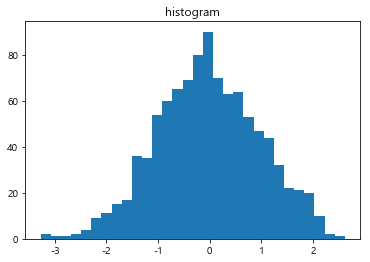

In [14]:
data = np.random.randn(1000)


plt.title('histogram')
plt.hist(data,bins=30) # bins가 늘어나면 늘어날수록 막대 폭 좁아진다
plt.show()

- scatter plot : 2차원 데이터
- 데이터 집합의 상관관계를 살펴볼 수 있다

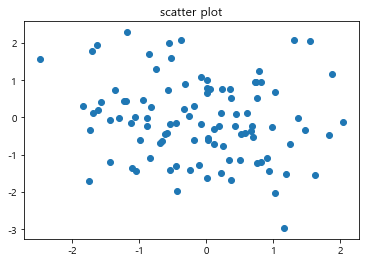

In [17]:
np.random.seed(100)
X = np.random.normal(0,1,100)
Y = np.random.normal(0,1,100)
 
plt.title('scatter plot')
plt.scatter(X,Y)
plt.show()

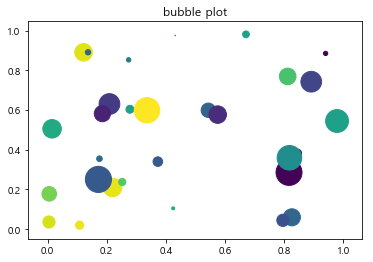

In [18]:
np.random.seed(100)
X = np.random.rand(30)
Y1 = np.random.rand(30)
Y2 = np.random.rand(30)
Y3 = np.pi * (15 * np.random.rand(30))**2

plt.title('bubble plot')
plt.scatter(X,Y1,c=Y2,s=Y3) # c는 컬러 s는 사이즈
plt.show()

### DF의 시각화

In [26]:
np.random.seed(0)
sample_df = pd.DataFrame(np.random.randn(100,3),
                         index = pd.date_range('1/1/2020',periods = 100),
                         columns = ['A','B','C'])
sample_df.head()

,A,B,C
2020-01-01,1.764052,0.400157,0.978738
2020-01-02,2.240893,1.867558,-0.977278
2020-01-03,0.950088,-0.151357,-0.103219
2020-01-04,0.410599,0.144044,1.454274
2020-01-05,0.761038,0.121675,0.443863


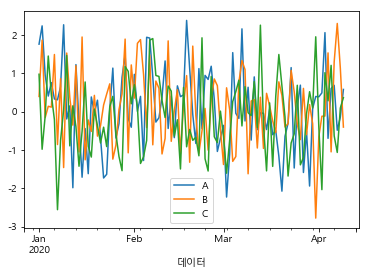

In [27]:
sample_df.plot()
plt.xlabel('월')
plt.xlabel('데이터')
plt.show()

In [28]:
import seaborn as sns
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

<function matplotlib.pyplot.show(*args, **kw)>

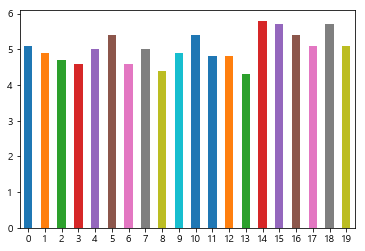

In [30]:
iris.sepal_length[:20].plot(kind = 'bar',rot=0)
plt.show

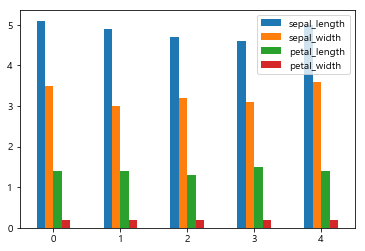

In [32]:
iris[:5].plot(kind='bar',rot=0)
plt.show()

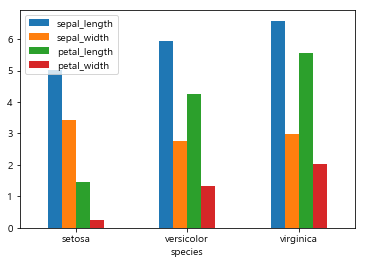

In [36]:
# 그룹분석으로 각 붓꽃종의 평균을 구하고 시각화 한다면?
iris.groupby(by='species').mean().plot(kind='bar',rot=0)

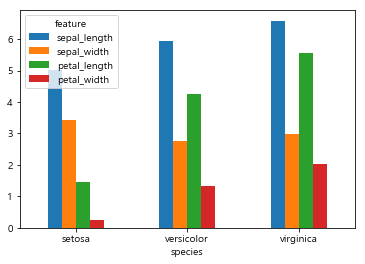

In [37]:
# 강사님 답
iris_bar_df=iris.groupby(by='species').mean()
iris_bar_df.columns.name = 'feature'
iris_bar_df.plot(kind='bar',rot=0)
plt.show()

Text(0.5,1,'종별 붓꽃의 길이와 너비의 평균')

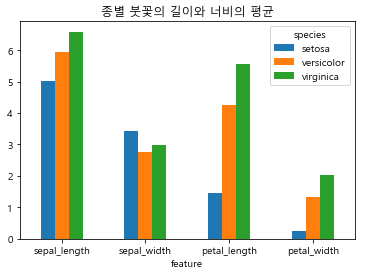

In [39]:
iris_bar_df.T.plot(kind='bar',rot=0)
plt.title('종별 붓꽃의 길이와 너비의 평균')

- pie,hist,box,scatter

### autopct 사용법
- '%0.2f' — 소숫점 두번째자리 까지 보여준다. 4.08
- '%0.2f%%' — 소숫점 두번째자리까지 보여주고 맨 뒤에 ‘%’ 기호를 붙인다. 4.08%.
- (% 기호를 두 번 쓰는 이유는 문자열 포매팅 할 때 처음 % 기호가 이스케이프 문자처럼 작동하기 때문이다.)
- '%d%%' — 가장 가까운 정수로 반올림하고 맨 뒤에 % 기호를 붙인다.


In [46]:
titanic.head()

# 선실별 승객 수 비율을 파이 차트로 구현하기
count = titanic.groupby(by='class').size()
ratio = count/len(titanic)*100
ratio

class
First     24.242424
Second    20.650954
Third     55.106622
dtype: float64

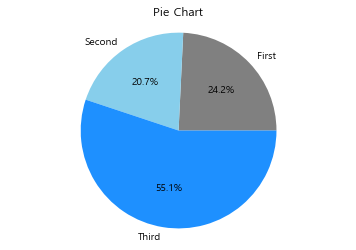

In [52]:
colors = ['grey','skyblue','dodgerblue']
plt.title('Pie Chart')
plt.pie(ratio,labels = ratio.index, colors = colors,autopct='%1.1f%%') 
# shadow = True 음영이 그려짐
# 퍼센트 적용 -> autopct='%1.1f%%' 라벨로 나오게 한다
plt.axis('equal') # 원형을 유지
plt.show()

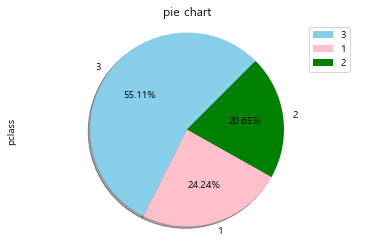

In [63]:
# 강사님 답
pclass_ratio_cnt = titanic.pclass.value_counts()
pclass_ratio_cnt.plot.pie(autopct='%.2f%%',
                         startangle=45,
                         legend=True,
                         shadow = True,
                         labels = pclass_ratio_cnt.index,
                         colors = ['skyblue','pink','green']) # 시리즈에 바로 적용하는 방법
plt.axis('equal')
plt.title('pie chart')
plt.show()

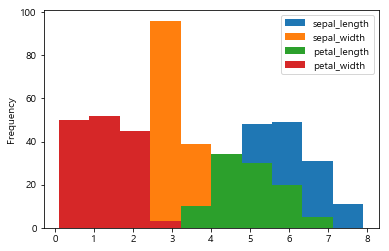

In [69]:
# iris 각 피처별 빈도수 히스토그램 시각화
iris.plot.hist()

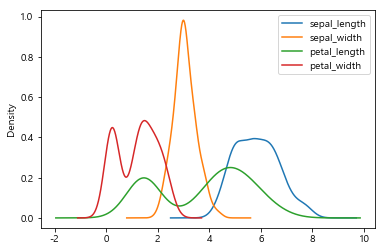

In [71]:
# KDE(Kernel Density Plot)
iris.plot.kde()
plt.show()

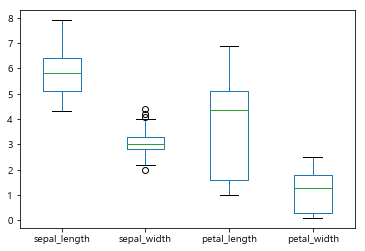

In [72]:
iris.plot.box()
plt.show()